Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load the data

In [101]:
data_set=pd.read_csv('LoanData.csv')
data_set.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


information about the data

In [102]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


total number of entries are 614 columns but some columns are having less than 614 non null values.

In [103]:
data_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- count: The number of non-null values in each feature. It indicates how many data points are available for analysis.
- mean: The average value of the feature across all data points. It gives you an idea of the central tendency of the data.
- std: The standard deviation of the feature, which measures the dispersion or spread of the values. A higher standard deviation indicates more spread out data points from the mean.
- min: The minimum value observed in the feature.
- 25%: The 25th percentile or the first quartile. This indicates the value below which 25% of the data falls.
- 50%: The 50th percentile or the median. This represents the middle value of the dataset when it's sorted in ascending order.
- 75%: The 75th percentile or the third quartile. This indicates the value below which 75% of the data falls.
- max: The maximum value observed in the feature.


some attributes (like ApplicantIncome) having outliers(mean = 5403.459283 but max = 810000)

In [104]:
data_set.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


a imblanced dataset we can see in most of the attributes(like Gender almost more than 85% are males only)

In [105]:
data_set['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [106]:
data_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

above we can see number of null values for each attribute

two types of data are there:
1)Numerical data=['ApplicantIncome',	'CoapplicantIncome','LoanAmount',	'Loan_Amount_Term','Credit_History']
2)Categorical data=['Loan_ID','Gender','Married',	'Dependents','Education', 'Self_Employed',	'Property_Area','Loan_Status']

fill the null values of categorical data with mode value(mostly repeated data)

In [107]:
Categorical_Data=['Loan_ID','Gender','Married',	'Dependents','Education', 'Self_Employed','Property_Area','Loan_Status']

for feature_names in Categorical_Data:
  data_set[feature_names]=data_set[feature_names].fillna(data_set[feature_names].mode()[0])

data_set.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

above we can see we filled the null values of categorical attributes with mode value of that categorical attrbute

now fill the null values of numeric attributes

In [108]:
Numeric_Data=['ApplicantIncome',	'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for feature_names in Numeric_Data:
  data_set[feature_names]=data_set[feature_names].fillna(data_set[feature_names].median())

data_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

no null values next we will remove outliers

**Outilers detection and Handling**

In [109]:
print(data_set.shape)

(614, 13)


ApplicantIncome	CoapplicantIncome	LoanAmount are having outliers (se max value and their mean) Loan_Amount_Term	Credit_History not having outliers

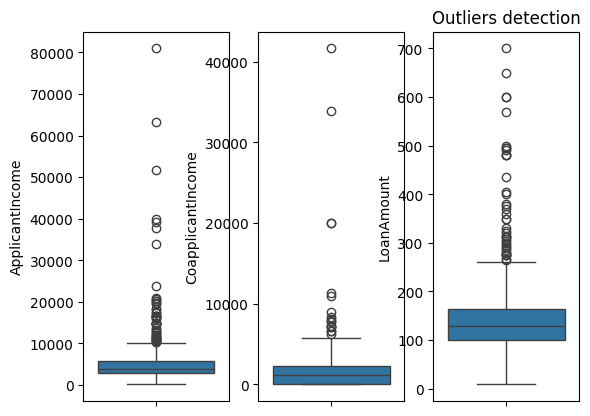

In [110]:
plt.figsize=(15,6)

plt.subplot(1,3,1)
sns.boxplot(data_set['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data_set['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data_set['LoanAmount'])

plt.title("Outliers detection")
plt.show()

after 25000 for ApplicantIncome outliers are there and for loan amount after 400 and coapplicantIncome 12000 respectively

In [111]:

feature=['ApplicantIncome','CoapplicantIncome','LoanAmount']
number=[25000,12000,400]
for i in range(len(feature)):
  print("for {f} Before removing the outliers".format(f=feature[i]),data_set.shape)
  data_set=data_set[data_set[feature[i]]<number[i]]
  print("for {f} After removing the outliers".format(f=feature[i]),data_set.shape)
  print('\n')

for ApplicantIncome Before removing the outliers (614, 13)
for ApplicantIncome After removing the outliers (607, 13)


for CoapplicantIncome Before removing the outliers (607, 13)
for CoapplicantIncome After removing the outliers (603, 13)


for LoanAmount Before removing the outliers (603, 13)
for LoanAmount After removing the outliers (591, 13)




**Analysis**

<ipython-input-112-023e2e611a11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set[feature[i]],color='green')
<ipython-input-112-023e2e611a11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set[feature[i]],color='green')
<ipython-input-112-023e2e611a11>:3: UserWarning: 

`distplot

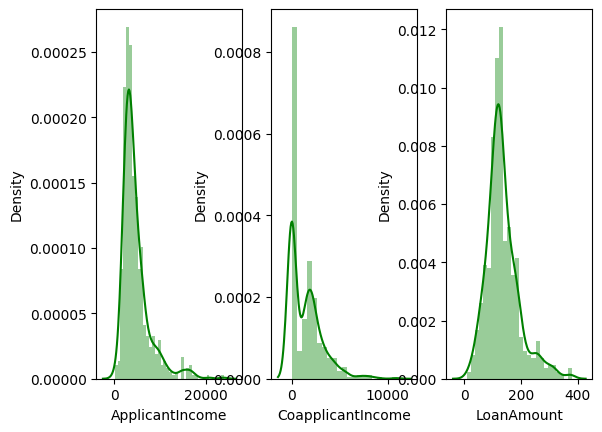

In [112]:
for i in range(len(feature)):
  plt.subplot(1,3,i+1)
  sns.distplot(data_set[feature[i]],color='green')

we can see ApplicantIncome is right skewed have to make normally distributed co app;icant also same and loan amount is perfect so no need

<ipython-input-113-4e1d2f338f44>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set['ApplicantIncome'], color = 'green')
<ipython-input-113-4e1d2f338f44>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set['CoapplicantIncome'], color = 'green')
<ipython-input-113-4e1d2f338f44>:11: U

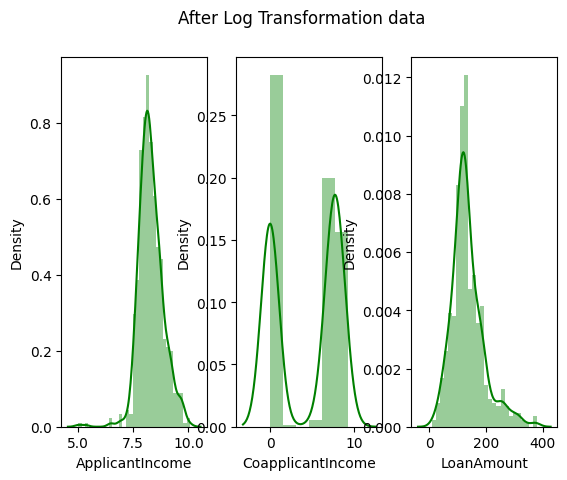

In [113]:
data_set['ApplicantIncome'] = np.log(data_set['ApplicantIncome'])
data_set['CoapplicantIncome'] = np.log1p(data_set['CoapplicantIncome'])

plt.subplot(1, 3, 1)
sns.distplot(data_set['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data_set['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data_set['LoanAmount'], color = 'green')

plt.suptitle("After Log Transformation data")
plt.show()


In [114]:
numeric     = data_set.select_dtypes('number').columns.tolist()
categorical = data_set.select_dtypes('object').columns.tolist()

print(numeric)

print(categorical)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


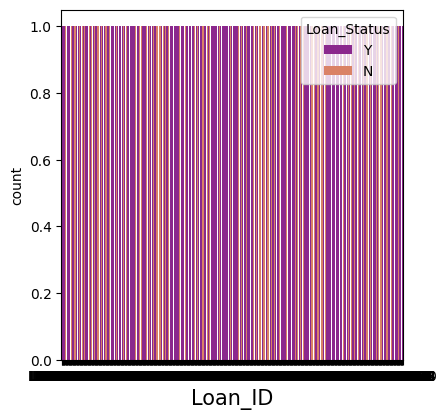

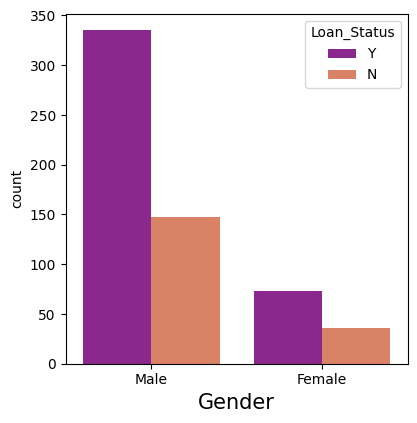

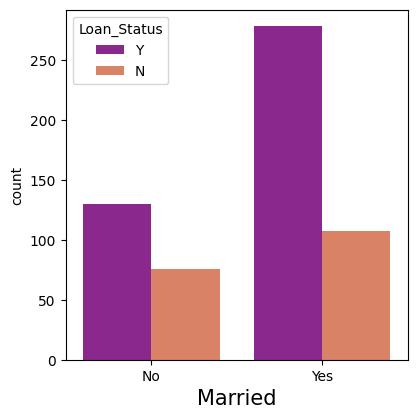

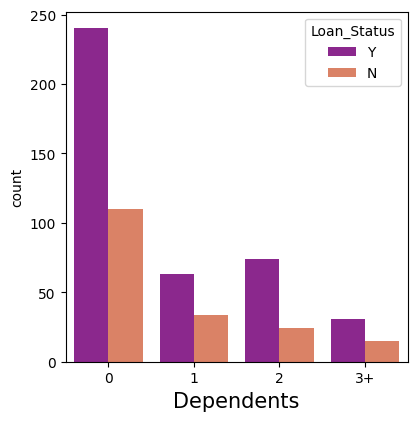

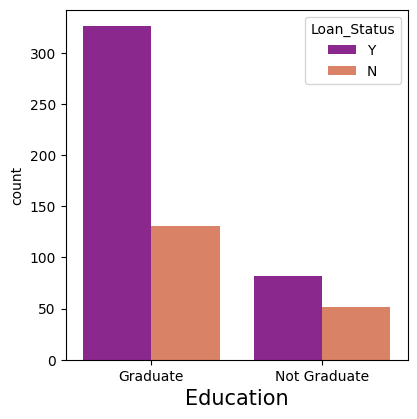

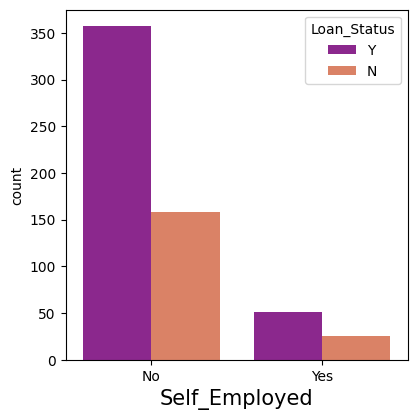

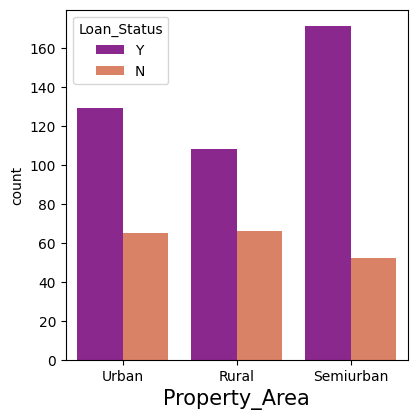

In [115]:
for cat in categorical[:-1]:
  plt.figure(figsize=(15,10))
  plt.subplot(2,3,1)
  sns.countplot(x=cat,hue='Loan_Status',data=data_set,palette='plasma')
  plt.xlabel(cat,fontsize=15)

In [116]:
columns=data_set.columns.tolist()
columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [117]:
for attribute in categorical[1:-1]:
  print(pd.crosstab(data_set['Loan_Status'],data_set[attribute]))


Gender       Female  Male
Loan_Status              
N                36   147
Y                73   335
Married       No  Yes
Loan_Status          
N             76  107
Y            130  278
Dependents     0   1   2  3+
Loan_Status                 
N            110  34  24  15
Y            240  63  74  31
Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82
Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


we can see imbalance in data distribution

**Data** **Preparation**

In [118]:
data_set.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


no need for loan_id

In [119]:
data_set=data_set.drop(['Loan_ID'],axis=1)

In [120]:
data_set.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [121]:
categorical_data=data_set.select_dtypes('object').columns.tolist()

for feature in categorical_data:
  unique_values = data_set[feature].unique()
  replacement_dict={value: idx for idx,value in enumerate(unique_values)}
  data_set[feature]=data_set[feature].replace(replacement_dict)

data_set.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,8.674026,0.000000,128.0,360.0,1.0,0,0
1,0,1,1,0,0,8.430109,7.319202,128.0,360.0,1.0,1,1
2,0,1,0,0,1,8.006368,0.000000,66.0,360.0,1.0,0,0
3,0,1,0,1,0,7.856707,7.765993,120.0,360.0,1.0,0,0
4,0,0,0,0,0,8.699515,0.000000,141.0,360.0,1.0,0,0


all categorical attributes data changed to numeric

In [122]:
y=data_set['Loan_Status']
x=data_set.drop(['Loan_Status'],axis=1)
print(x.shape)
print(y.shape)
print(x.columns)
print(x)
print(y)

(591, 11)
(591,)
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0           0          0              0         8.674026   
1         0        1           1          0              0         8.430109   
2         0        1           0          0              1         8.006368   
3         0        1           0          1              0         7.856707   
4         0        0           0          0              0         8.699515   
..      ...      ...         ...        ...            ...              ...   
609       1        0           0          0              0         7.972466   
610       0        1           3          0              0         8.320205   
611       0        1           1          0           

In [123]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Training Accuracy",LR.score(x_train,y_train))
print("Testing Accuracy",LR.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print("Logistic Regession model accuracy:",accuracy_score(y_pred,y_test))

# Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train, y_train)
svm_y_pred = svm_classifier.predict(x_test)
print("SVM Training Accuracy:", svm_classifier.score(x_train, y_train))
print("SVM Testing Accuracy:", svm_classifier.score(x_test, y_test))
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))
print("SVM Model Accuracy:", accuracy_score(svm_y_pred, y_test))

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

rf_y_pred = rf_classifier.predict(x_test)

print("\nRandom Forest Training Accuracy:", rf_classifier.score(x_train, y_train))
print("Random Forest Testing Accuracy:", rf_classifier.score(x_test, y_test))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Model Accuracy:", accuracy_score(rf_y_pred, y_test))



# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=20, random_state=42)
dt_classifier.fit(x_train, y_train)

dt_y_pred = dt_classifier.predict(x_test)

print("\nDecision Tree Training Accuracy:", dt_classifier.score(x_train, y_train))
print("Decision Tree Testing Accuracy:", dt_classifier.score(x_test, y_test))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("Decision Tree Model Accuracy:", accuracy_score(dt_y_pred, y_test))

Training Accuracy 0.8216704288939052
Testing Accuracy 0.7837837837837838
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       104
           1       0.88      0.32      0.47        44

    accuracy                           0.78       148
   macro avg       0.82      0.65      0.67       148
weighted avg       0.80      0.78      0.75       148

Logistic Regession model accuracy: 0.7837837837837838


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM Training Accuracy: 0.8239277652370203
SVM Testing Accuracy: 0.7905405405405406
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       104
           1       0.93      0.32      0.47        44

    accuracy                           0.79       148
   macro avg       0.85      0.65      0.67       148
weighted avg       0.82      0.79      0.75       148

SVM Model Accuracy: 0.7905405405405406

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.777027027027027
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       104
           1       0.79      0.34      0.48        44

    accuracy                           0.78       148
   macro avg       0.78      0.65      0.67       148
weighted avg       0.78      0.78      0.74       148

Random Forest Model Accuracy: 0.777027027027027

Decision Tree Training 

**Handling Imbalance data**

In [124]:
from imblearn.over_sampling import SMOTE

SMOTE stands for Synthetic Minority Over-sampling Technique. It's a technique used in the field of machine learning and specifically in dealing with imbalanced datasets, where one class is significantly more frequent than the other(s).

In classification tasks, imbalanced datasets can lead to models that have poor predictive performance, particularly for the minority class. SMOTE is a method used to generate synthetic samples from the minority class in order to balance the class distribution.

Here's how SMOTE works:

1. For each minority class sample, SMOTE selects its k-nearest neighbors (usually k=5).
2. It then randomly selects one of these neighbors and creates a synthetic example at a point along the line segment joining the minority sample and its selected neighbor in the feature space.
3. This process continues until the desired balance between the minority and majority classes is achieved.

SMOTE helps to alleviate the class imbalance problem by introducing synthetic examples, thereby making the dataset more balanced and improving the performance of classifiers, especially in situations where the minority class is important.

`imblearn` is a Python library that provides a variety of techniques for dealing with imbalanced datasets, including SMOTE. The `SMOTE` class in `imblearn.over_sampling` module implements the SMOTE algorithm. It allows you to apply the SMOTE technique to your dataset in order to oversample the minority class and balance the class distribution.

In [125]:
x_rasample,y_rasample=SMOTE().fit_resample(x,y.values.ravel())

In [126]:
print(x_rasample.shape)
print(y_rasample.shape)

(816, 11)
(816,)


**Train Test Split**

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x_rasample,y_rasample,test_size=0.25,random_state=42)

In [129]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(612, 11)
(204, 11)
(612,)
(204,)


**Model building**

In [130]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

x_train,x_test,y_train,y_test=train_test_split(x_rasample,y_rasample,test_size=0.25,random_state=42)

#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Training Accuracy",LR.score(x_train,y_train))
print("Testing Accuracy",LR.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print("Logistic Regession model accuracy:",accuracy_score(y_pred,y_test))

# Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train, y_train)
svm_y_pred = svm_classifier.predict(x_test)
print("SVM Training Accuracy:", svm_classifier.score(x_train, y_train))
print("SVM Testing Accuracy:", svm_classifier.score(x_test, y_test))
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))
print("SVM Model Accuracy:", accuracy_score(svm_y_pred, y_test))

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

rf_y_pred = rf_classifier.predict(x_test)

print("\nRandom Forest Training Accuracy:", rf_classifier.score(x_train, y_train))
print("Random Forest Testing Accuracy:", rf_classifier.score(x_test, y_test))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Model Accuracy:", accuracy_score(rf_y_pred, y_test))



# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=20, random_state=42)
dt_classifier.fit(x_train, y_train)

dt_y_pred = dt_classifier.predict(x_test)

print("\nDecision Tree Training Accuracy:", dt_classifier.score(x_train, y_train))
print("Decision Tree Testing Accuracy:", dt_classifier.score(x_test, y_test))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("Decision Tree Model Accuracy:", accuracy_score(dt_y_pred, y_test))



Training Accuracy 0.7973856209150327
Testing Accuracy 0.7892156862745098
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        97
           1       0.93      0.64      0.76       107

    accuracy                           0.79       204
   macro avg       0.82      0.80      0.79       204
weighted avg       0.83      0.79      0.79       204

Logistic Regession model accuracy: 0.7892156862745098


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM Training Accuracy: 0.7630718954248366
SVM Testing Accuracy: 0.7352941176470589
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        97
           1       1.00      0.50      0.66       107

    accuracy                           0.74       204
   macro avg       0.82      0.75      0.72       204
weighted avg       0.83      0.74      0.72       204

SVM Model Accuracy: 0.7352941176470589

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.8480392156862745
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        97
           1       0.96      0.74      0.84       107

    accuracy                           0.85       204
   macro avg       0.87      0.85      0.85       204
weighted avg       0.87      0.85      0.85       204

Random Forest Model Accuracy: 0.8480392156862745

Decision Tree Trainin